### Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import data

In [49]:
df = pd.read_csv('supermarkets_data_enriched.csv')
df.head()

,Unnamed: 0,type,id,lat,lon,brand,shop,addr:city,addr:housenumber,addr:postcode,geometry,index_right,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,0,node,33126515,47.155616,9.037915,Spar,supermarket,NaN,NaN,NaN,POINT (9.0379152 47.1556157),227,Schänis,3315,3876,97.142857,13.054696,1408.0
1,1,node,280130028,47.155492,9.039666,ALDI,supermarket,Schänis,3,8718.0,POINT (9.0396663 47.1554921),227,Schänis,3315,3876,97.142857,13.054696,1408.0
2,2,node,6122906632,47.158959,9.044477,Denner,supermarket,Schänis,14,8718.0,POINT (9.0444769 47.1589589),227,Schänis,3315,3876,97.142857,13.054696,1408.0
3,3,node,9019298862,47.155185,9.038472,Lidl,supermarket,NaN,NaN,NaN,POINT (9.0384722 47.1551854),227,Schänis,3315,3876,97.142857,13.054696,1408.0
4,4,node,36726161,47.226191,8.980329,Migros,supermarket,Uznach,25,8730.0,POINT (8.9803292 47.2261912),1217,Uznach,3339,6489,860.610080,27.862537,3500.0


In [40]:
df['brand'].value_counts()

Coop                                     497
Migros                                   495
Denner                                   423
Volg                                     210
ALDI                                      72
Spar                                      63
Lidl                                      58
Aldi                                      52
VOI Migros Partner                        44
Landi                                     39
Alnatura                                  15
Migros-Outlet                             12
VOI                                        8
Pam                                        4
Jumbo                                      2
Crai                                       2
Globus                                     2
ZWIBOL                                     1
Lidl Schweiz                               1
Eurospar                                   1
Proxi                                      1
Denner;Migros                              1
gazi      

### Barchart of supermarket brands in Switzerland

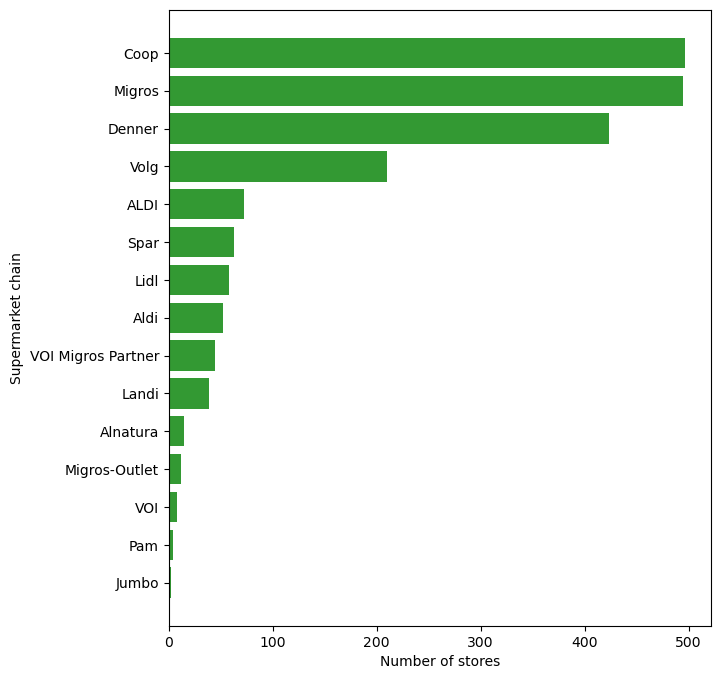

In [41]:
df_bar = df['brand'].value_counts().nlargest(15).sort_values(ascending=True)

# Values for barchart
nstores = list(df_bar.values)
index = list(df_bar.index.values)
y_pos = np.arange(len(index))

# Figure
fig, ax = plt.subplots(figsize=(7,8))
ax.barh(y_pos, nstores, align='center', color='g', alpha=0.8)
ax.set_yticks(y_pos, index)
ax.set_xlabel('Number of stores', fontsize=10)
ax.set_ylabel('Supermarket chain', fontsize=10)

# Show graph
plt.show()

### Scatterplot-matrix (seaborn)

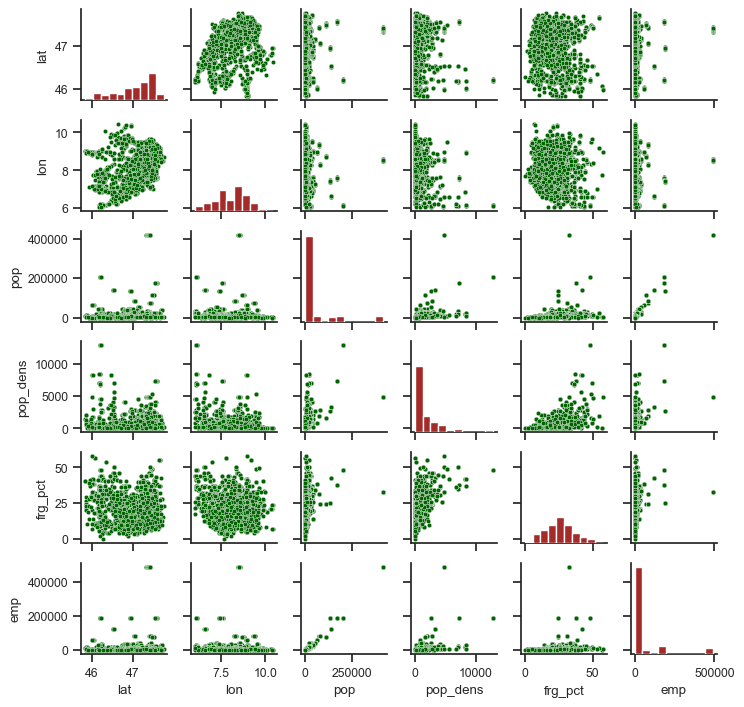

In [46]:
sns.set(style="ticks", font_scale=0.8)
g = sns.PairGrid(df[['lat', 
                     'lon', 
                     'pop', 
                     'pop_dens',
                     'frg_pct',
                     'emp']], 
                 height=1.2, 
                 aspect=1)
g.map_upper(sns.scatterplot,color='darkgreen', s=10)
g.map_lower(sns.scatterplot, color='darkgreen', s=10)
g.map_diag(plt.hist, color='brown')

### Supermarket map plot for 'Denner', 'Volg' and 'Landi'

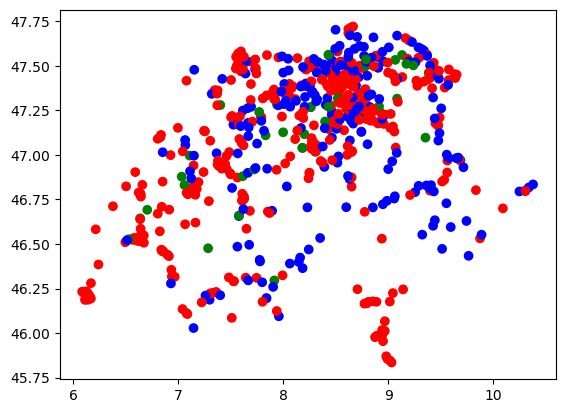

In [43]:
df_map = df.loc[df['brand'].isin(['Denner', 'Volg', 'Landi'])]
colors = {'Denner': 'red', 'Volg': 'blue', 'Landi': 'green'}
plt.scatter(df_map['lon'], df_map['lat'], c=df_map['brand'].map(colors))

### Jupyter notebook --footer info--

In [47]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.0.0
Datetime: 2023-10-14 17:20:17
Python Version: 3.9.13
-----------------------------------
